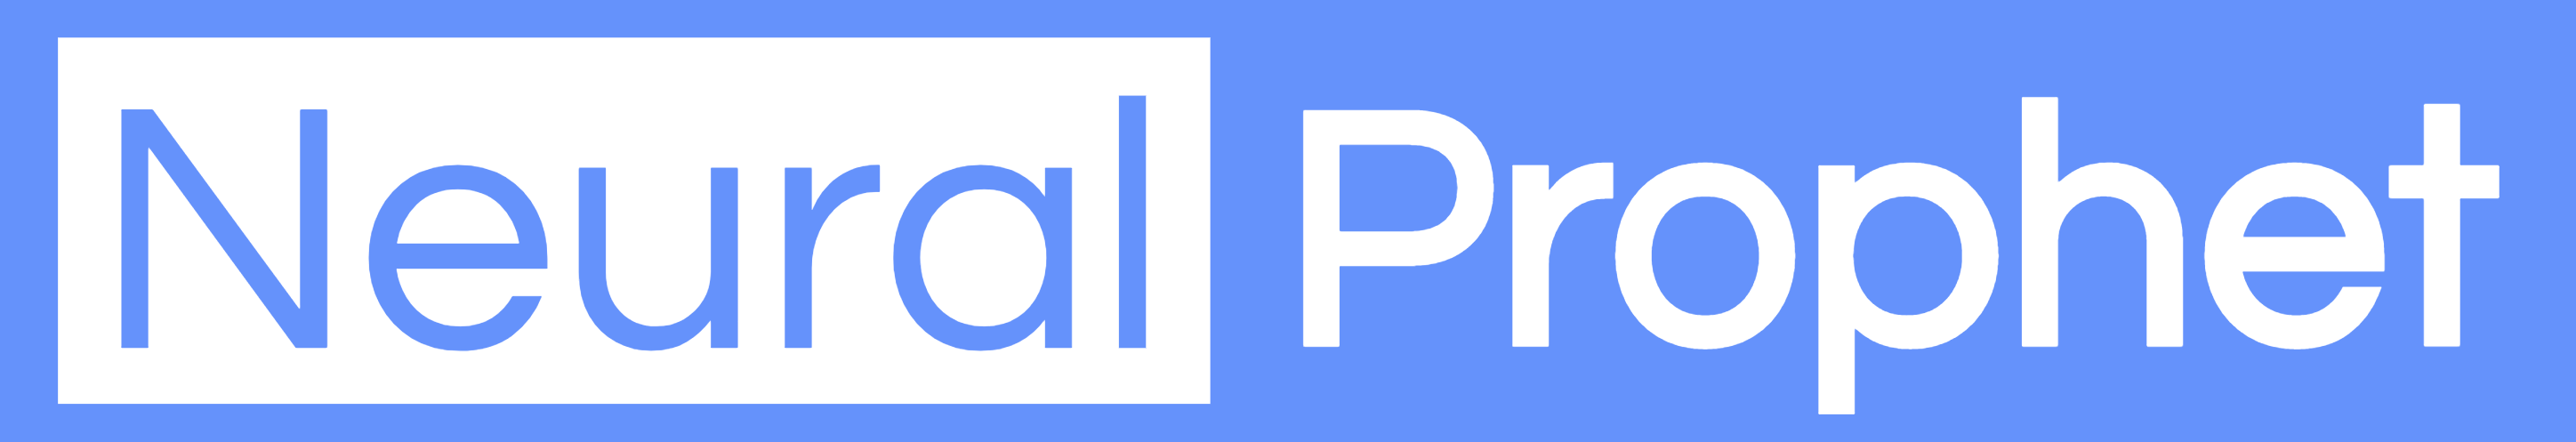

In [1]:
from IPython.display import Image
Image("https://user-images.githubusercontent.com/21246060/111388960-6c367e80-866d-11eb-91c1-46f2c0d21879.PNG")

In this notebook, we will build a time series forecasting model using NeuralProphet. In this notebook, we will use AirPassengers Dataset that provides monthly totals of a US airline passengers, from 1949 to 1960. 

# Breakdown of this notebook:
1. **Introduction to NeuralProphet**
2. **Advantages of NeuralProphet**
3. **Changes from Prophet**
4. **Installation of NeuralProphet**
5. **Importing Libraries**
6. **Import Input Data**
7. **Preprocessing of the dataset** 
 - Renaming Columns.
 - Changing data type.
8. **Visualize the dataset**
9. **Training NeuralProphet Model**
    - Visualize the forecast by model
    - Visualize the components
    - Visualize the parameters
    - Visualize Training and Validation Loss
10. **Conclusion**
11. **References**

## Introduction to NeuralProphet
NeuralProphet is a PyTorch implementation of a user-friendly time series forecasting tool for practitioners based on Neural Networks. This is heavily influenced by Prophet, a popular Facebook-developed forecasting tool. NeuralProphet is built on a fully modular architecture that allows it to grow in the future as new components are added. This is a user-friendly forecasting tool that maintains the original goals of Prophet, such as interpretability and configurability, while also adding new features, such as automatic differencing capabilities,by using PyTorch as the backend.

## Advantages of NeuralProphet
NeuralProphet revolutionises time series modelling and forecasting:
- Auto-regression and covariates are supported.
- Hyperparameters related to training are automatically selected.
- Fourier term seasonality at various time scales, including yearly, daily, weekly, and hourly.
- Piecewise linear trend with automatic changepoint detection as an option.
- Forecast component plotting, model coefficient plotting, and final prediction plotting
- Global modelling assistance.
- Future and lag regressors
- Regularization reduces coefficient sparsity.
- Python package that is both user-friendly and powerful:

## Changes from NeuralProphet
In comparison to the original Prophet, NeuralProphet has a number of additional features. The following are the details.
- Optimisation using Gradient Descent with PyTorch as the backend.
- Using AR-Net to model time series autocorrelation
- Using a separate Feed-Forward Neural Network to model lagged regressors.
- FFNNs with configurable non-linear deep layers.
- Adaptable to different forecast horizons (greater than 1).
- Losses and metrics that are unique to you.

## Installation of NeuralProphet
we can directly install neuralprophet using pip:


In [2]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 307 kB/s            


## Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from neuralprophet import NeuralProphet

## Import input data

In [5]:
df = pd.read_csv('AirPassengers.csv')

In [6]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [7]:
## Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Preprocessing of the dataset
NeuralProphet expects only two columns by default- a column called ‘ds’ which stands for dates and another column called ‘y’ which represents the value that we’re trying to predict. 

### Renaming Columns

In [8]:
## Renaming columns
df.rename(columns = {'Month':'ds', '#Passengers':'y'}, inplace = True)
df.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### Changing data-type
The important thing to note here is that, the ds column must be of the datetime type. But, we can see that it is of object data type. 
Now, because the ds column is not of the datetime type. So, we’ll need to convert it into datetime type.

In [9]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


## Visualize the dataset

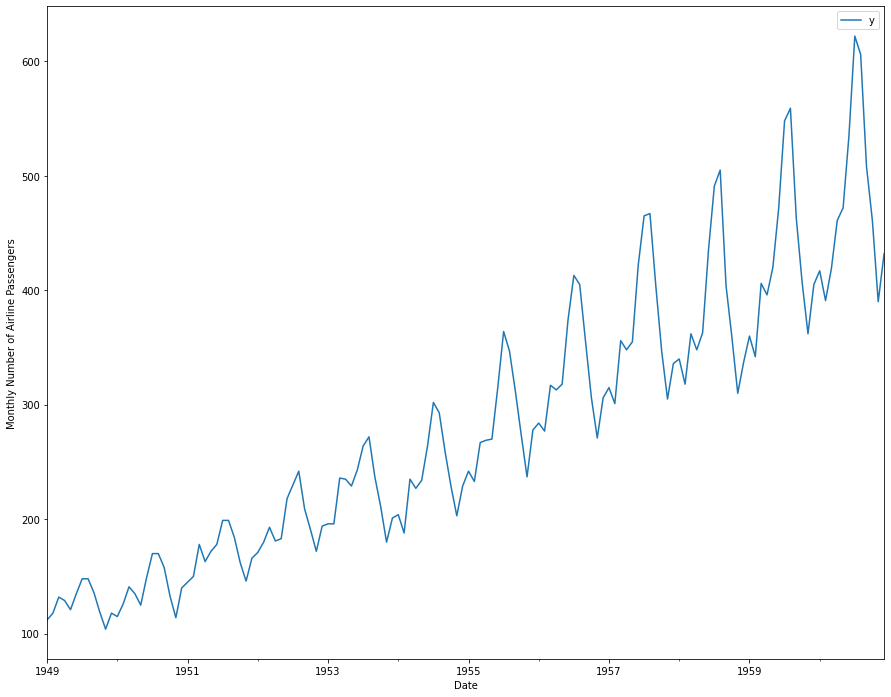

In [10]:
ax = df.set_index('ds').plot(figsize=(15, 12))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

## Training a NeuralProphet Model

We'll make a simple model with neural_prophet for this dataset, which can be fitted by creating an object of the NeuralProphet class. Here, the frequency of the dataset is 'month'. So we will use the change the frequency parameter accordingly. All the parameter are set by default by NeuralProphet.
Model validation for NeuralProphet can be done in two ways. Users can split the dataset manually to validate after the model fitting like below by specifying the fraction of data to be used for validation in the argument valid_p. In this notebook, we will use the first method.

In [11]:
m = NeuralProphet()
df_train, df_val = m.split_df(df, freq='M', valid_p = 0.2)
metrics = m.fit(df_train, freq='M', validation_df=df_val, plot_live_loss=True)

INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 308


  0%|          | 0/205 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.03E-02, min: 2.11E+00


  0%|          | 0/205 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.37E-02, min: 1.90E+00


  0%|          | 0/205 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.66E-02, min: 2.58E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.63E-02
  0%|          | 0/308 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[308/308]: 100%|██████████| 308/308 [00:04<00:00, 62.55it/s, SmoothL1Loss=0.00137, MAE=12.4, RMSE=16.5, RegLoss=0, MAE_val=32.7, RMSE_val=40.1, SmoothL1Loss_val=0.00794]


In [12]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.808208,391.258398,475.713099,0.0,1.734965,700.618774,780.623535
1,0.796321,387.056419,468.923863,0.0,1.715349,694.369812,774.031555
2,0.784161,382.712769,461.419970,0.0,1.693704,687.482422,766.744812
3,0.770346,377.865009,455.380294,0.0,1.669263,679.687561,758.553406
4,0.755856,372.734439,455.447914,0.0,1.640738,670.583618,748.896973
...,...,...,...,...,...,...,...
303,0.001368,12.357227,16.459290,0.0,0.007948,32.708504,40.092136
304,0.001368,12.359153,16.068780,0.0,0.007945,32.704624,40.085094
305,0.001368,12.358521,16.554839,0.0,0.007944,32.702972,40.082809
306,0.001368,12.358382,16.188770,0.0,0.007944,32.702946,40.082794


In [13]:
future = m.make_future_dataframe(df, periods=24, n_historic_predictions=len(df))
forecast = m.predict(future)
forecast

,ds,y,yhat1,residual1,trend,season_yearly
0,1949-01-01,112,103.345238,-8.654762,125.784218,-22.438976
1,1949-02-01,118,99.801270,-18.19873,126.168396,-26.367125
2,1949-03-01,132,128.750641,-3.249359,126.515388,2.235244
3,1949-04-01,129,120.957283,-8.042717,126.899559,-5.942275
4,1949-05-01,121,120.610062,-0.389938,127.271347,-6.661283
...,...,...,...,...,...,...
163,1962-07-31,None,591.832031,NaN,539.156494,52.675541
164,1962-08-31,None,560.498657,NaN,542.073608,18.425051
165,1962-09-30,None,524.289795,NaN,544.896606,-20.606863
166,1962-10-31,None,503.176239,NaN,547.813782,-44.637547


### Visualize the forecast by model

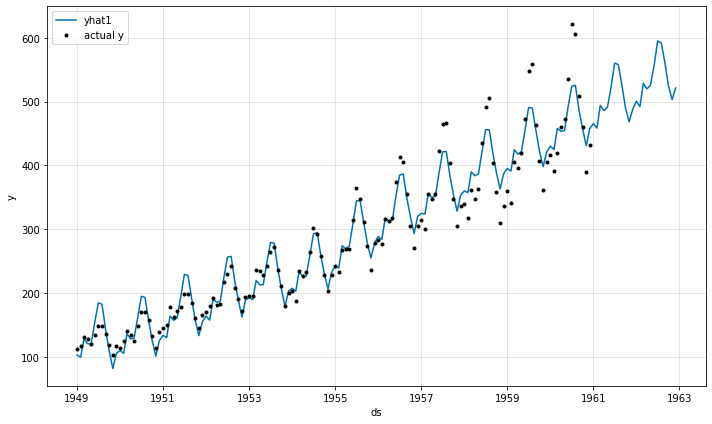

In [14]:
fig_forecast = m.plot(forecast)

### Visualize the components

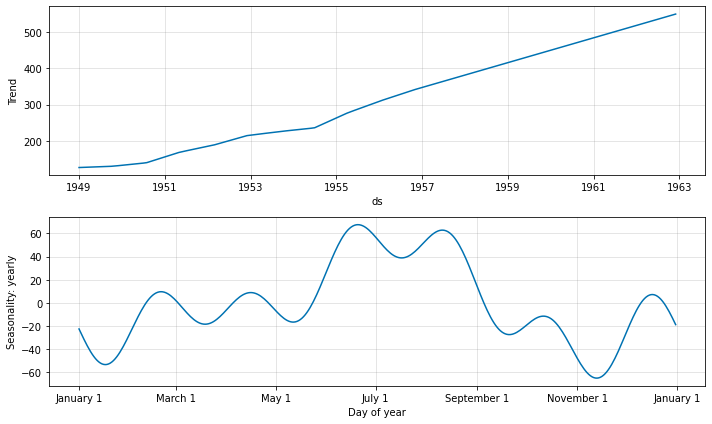

In [15]:
fig_components = m.plot_components(forecast)

### Visualize the model parameters

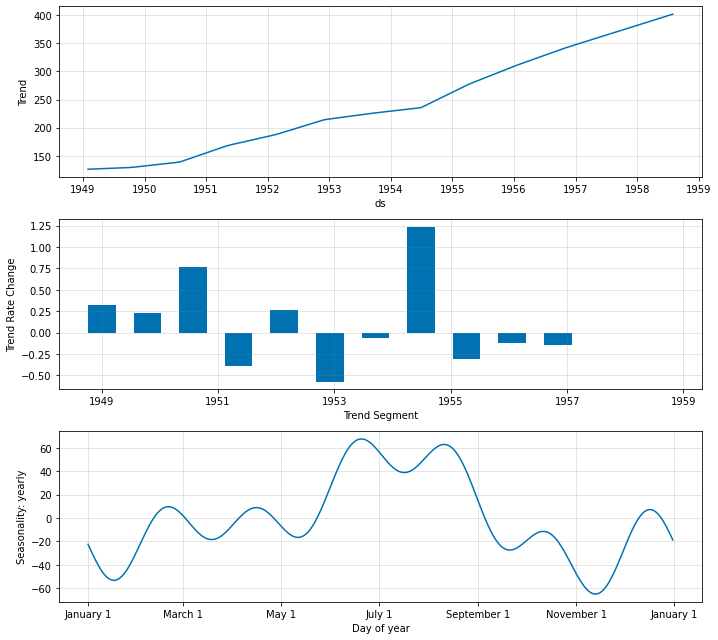

In [16]:
fig_model = m.plot_parameters()

## Visualize Training and Validation Loss

Text(0.5, 1.0, 'Model Loss (MAE)')

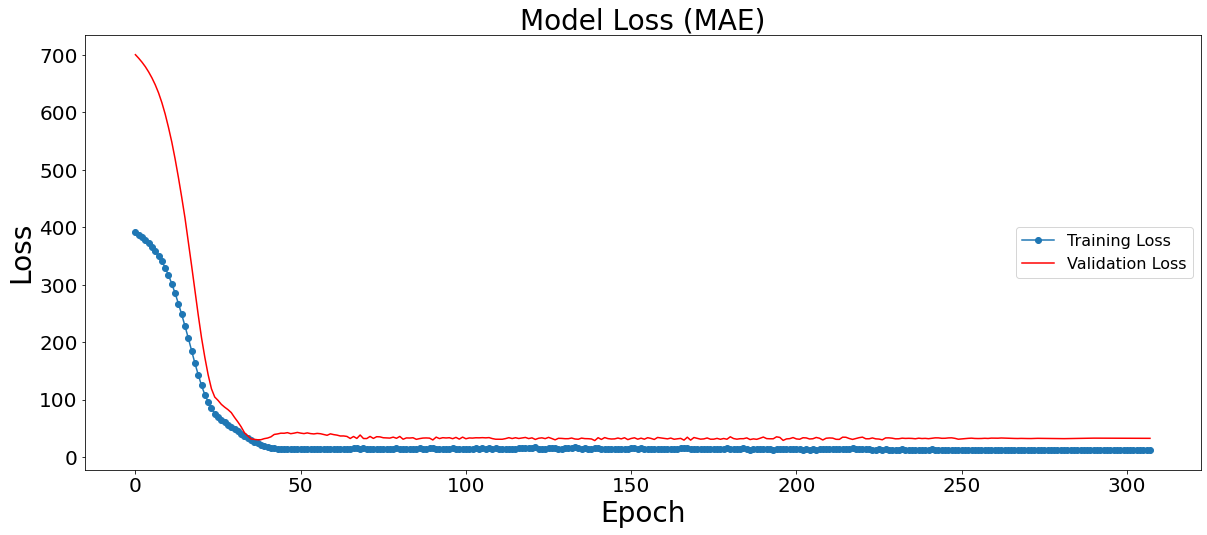

In [17]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE)", fontsize=28)

## Conclusion
In this notebook, we discussed NeuralProphet, a Python package that uses Neural Networks to model time series. The library's backend is PyTorch. In this article, we developed a prediction model using time-series data on Air Passengers. NeuralProphet is built on a fully modular architecture based on AR-Net, making it scalable to incorporate new features in the future.

## References
 - [NeuralProphet GitHub Repository](https://github.com/ourownstory/neural_prophet)
 - [Prophet Documentation](https://facebook.github.io/prophet/)
 - [AR -Net Paper](https://arxiv.org/pdf/1911.12436.pdf)

## End of the notebook